In [1]:
import pandas as pd, matplotlib.pyplot as plt, contextily as ctx, geopandas as gpd, numpy as np, seaborn as sns

In [2]:
df = gpd.read_file("datasets\\Rosario F.xlsx")

In [3]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.Coord1__Longitude, y=df.Coord1__Latitude))
gdf = gpd.GeoDataFrame(df, geometry=gdf['geometry'])

In [4]:
gdf.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

EPSG:4326


In [24]:
paleta = {
    "FIT": "red",             
    "FdT": "lightblue",       
    "JxC": "yellow",          
    "LIBERTARIOS": "purple",  
    "NINGUNO/NOSABE": "darkgray",  
    "OTROS": "lightgray",     
    "PNK": "darkblue"         
}

In [6]:
rosario  = {
    "minx": -60.74,
    "maxx": -60.58,
    "miny": -33,
    "maxy": -32.88
}
#gdf = gdf.cx[rosario["minx"]:rosario["maxx"], rosario["miny"]:rosario["maxy"]]

In [7]:
radios = gpd.read_file("datasets\\radios_censales_santafe.shp")
radios = radios.cx[rosario["minx"]:rosario["maxx"], rosario["miny"]:rosario["maxy"]]
radios = gpd.GeoDataFrame(radios, geometry=radios.geometry)

barrios = gpd.read_file("datasets\\barrios.gml")
barrios = barrios.cx[rosario["minx"]:rosario["maxx"], rosario["miny"]:rosario["maxy"]]
barrios = gpd.GeoDataFrame(barrios, geometry=barrios.geometry)

In [8]:
radios.set_crs(epsg=4326, inplace=True)
barrios.set_crs(epsg=4326, inplace=True)
print("")

In [18]:
df_bar.head()

,interview__key,METODO,Coord1__Latitude,Coord1__Longitude,EDAD,GENERO,INT DE VOTO X ESPACIO,RADIO,geometry,index_right,gml_id,coordinates,MSLINK,BARRIO,OBSERVACIO
0,56-56-25-81,F2F,-32.881458,-60.695274,56 y mas,Masculino,LIBERTARIOS,820840409,POINT (-60.69527 -32.88146),48.0,barrios.49,"-60.781995,-32.885704 -60.686342,-32.869406",42.0,CELEDONIO ESCALADA,Mod Lím Or
1,67-96-98-06,F2F,-32.882259,-60.693571,36 a 45,Masculino,OTROS,820840410,POINT (-60.69357 -32.88226),48.0,barrios.49,"-60.781995,-32.885704 -60.686342,-32.869406",42.0,CELEDONIO ESCALADA,Mod Lím Or
2,24-21-01-39,F2F,-32.884731,-60.692882,56 y mas,Femenino,OTROS,820840502,POINT (-60.69288 -32.88473),42.0,barrios.43,"-60.720781,-32.906248 -60.680849,-32.875491",3.0,ALBERDI,Mod Lím Or
3,84-96-80-81,F2F,-32.884673,-60.693464,26 a 35,Masculino,LIBERTARIOS,820840502,POINT (-60.69346 -32.88467),42.0,barrios.43,"-60.720781,-32.906248 -60.680849,-32.875491",3.0,ALBERDI,Mod Lím Or
4,21-29-79-64,F2F,-32.918833,-60.703628,36 a 45,Femenino,NINGUNO/NOSABE,820841013,POINT (-60.70363 -32.91883),51.0,barrios.52,"-60.796934,-32.930182 -60.693353,-32.894015",4.0,LARREA Y EMPALME GRANEROS,Mod Lím Or


In [10]:
df_rad = gpd.sjoin(gdf, radios, how="inner", predicate="within")
df_bar = gpd.sjoin(gdf, barrios, how="left", predicate="within")

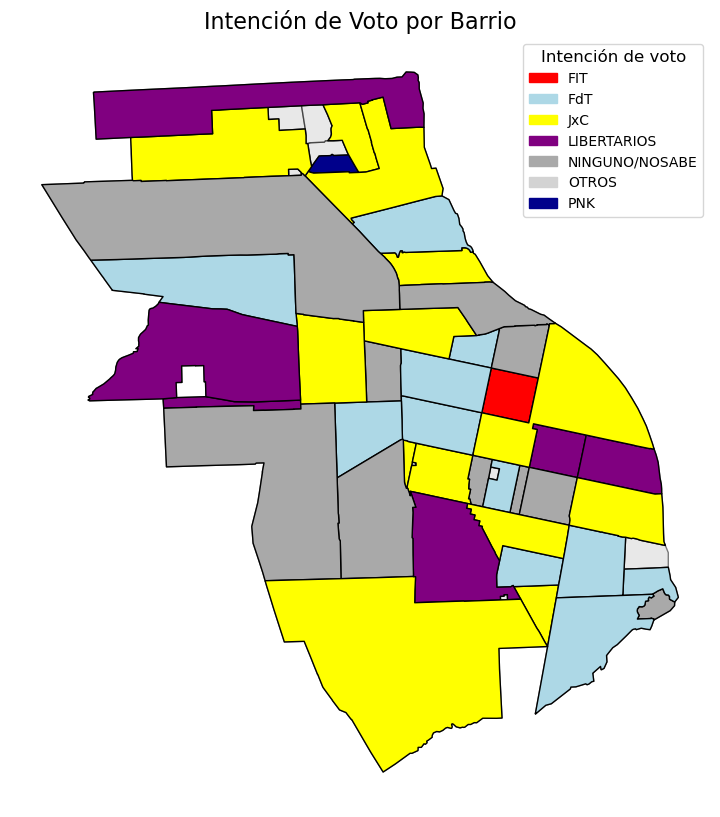

In [12]:
moda_vot = (
    df_bar.groupby(['BARRIO', 'INT DE VOTO X ESPACIO'])
    .size()
    .reset_index(name='conteo')
)

# Seleccionar la intención de voto con mayor cantidad por barrio
moda_vot = moda_vot.loc[
    moda_vot.groupby('BARRIO')['conteo'].idxmax()
]

barrios_2 = barrios.merge(moda_vot, on="BARRIO", how="inner")
barrios_2['color'] = barrios_2['INT DE VOTO X ESPACIO'].map(paleta).fillna('black')


# Graficar los datos de df_rad utilizando la paleta
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono de Rosario
barrios.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)  # Polígono de Rosario
barrios_2.plot(ax=ax, color=barrios_2['color'], edgecolor='black')

import matplotlib.patches as mpatches
# Crear los elementos de la leyenda basados en la paleta
leyenda = [
    mpatches.Patch(color=color, label=partido) for partido, color in paleta.items()
]

# Añadir la leyenda al gráfico
ax.legend(handles=leyenda, title="Intención de voto", loc='upper right', fontsize=10, title_fontsize=12)

# Personalización del gráfico
ax.set_title('Intención de Voto por Barrio', fontsize=16)
ax.axis('off')
plt.show()

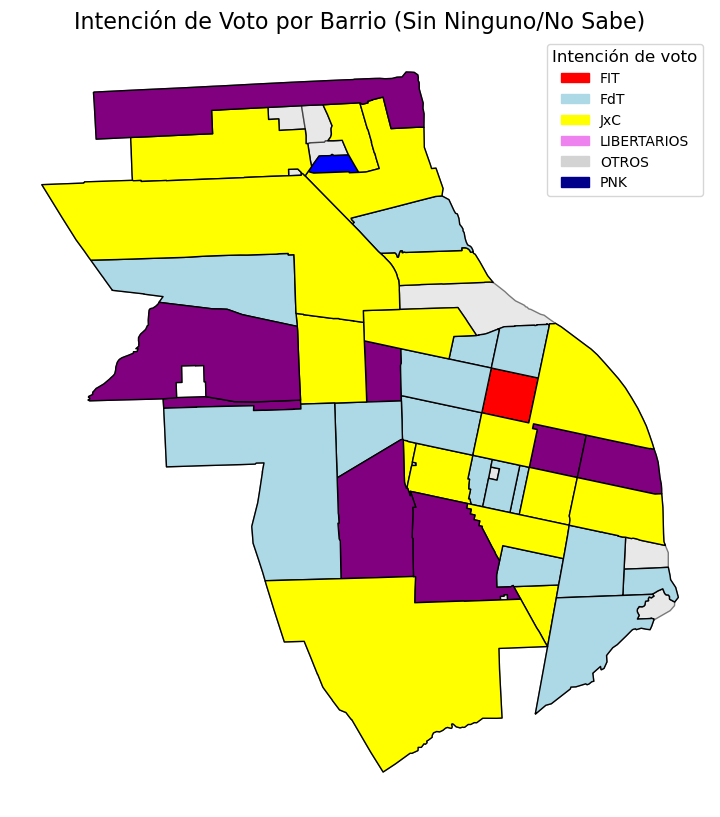

In [75]:
paleta_2= {
    "FIT": "red",             
    "FdT": "lightblue",       
    "JxC": "yellow",          
    "LIBERTARIOS": "violet",    
    "OTROS": "lightgray",     
    "PNK": "darkblue"         
}
df_bar_vot = df_bar[df_bar['INT DE VOTO X ESPACIO'] != "NINGUNO/NOSABE"]
moda_vot = (
    df_bar_vot.groupby(['BARRIO', 'INT DE VOTO X ESPACIO'])
    .size()
    .reset_index(name='conteo')
)

# Seleccionar la intención de voto con mayor cantidad por barrio
moda_vot = moda_vot.loc[
    moda_vot.groupby('BARRIO')['conteo'].idxmax()
]

barrios_3 = barrios.merge(moda_vot, on="BARRIO", how="inner")
barrios_3['color'] = barrios_3['INT DE VOTO X ESPACIO'].map(paleta).fillna('black')



fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono de Rosario
barrios.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)  # Polígono de Rosario
barrios_3.plot(ax=ax, color=barrios_3['color'], edgecolor='black')

import matplotlib.patches as mpatches
# Crear los elementos de la leyenda basados en la paleta
leyenda = [
    mpatches.Patch(color=color, label=partido) for partido, color in paleta_2.items()
]

# Añadir la leyenda al gráfico
ax.legend(handles=leyenda, title="Intención de voto", loc='upper right', fontsize=10, title_fontsize=12)

# Personalización del gráfico
ax.set_title('Intención de Voto por Barrio (Sin Ninguno/No Sabe)', fontsize=16)
ax.axis('off')
plt.show()

C:\Users\matic\AppData\Local\Temp\ipykernel_3328\3774350946.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  barrios_3['centroid'] = barrios_3.geometry.centroid


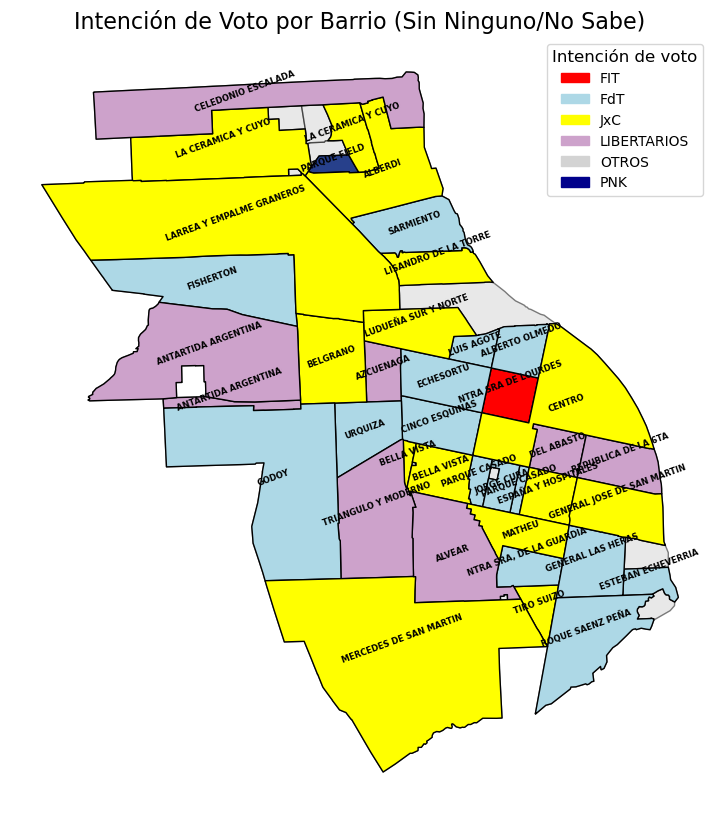

In [97]:
paleta_3= {
    "FIT": "red",             
    "FdT": "lightblue",       
    "JxC": "yellow",          
    "LIBERTARIOS": "#CDA2CB",    
    "OTROS": "lightgray",     
    "PNK": "#27408B"         
}
barrios_3['color'] = barrios_3['INT DE VOTO X ESPACIO'].map(paleta_3).fillna('black')
# Calcular el centroide de cada barrio para colocar el texto
barrios_3['centroid'] = barrios_3.geometry.centroid

# Graficar el polígono de Rosario
fig, ax = plt.subplots(figsize=(10, 10))
barrios.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)  # Polígono de Rosario
barrios_3.plot(ax=ax, color=barrios_3['color'], edgecolor='black')

# Añadir nombres de los barrios
for idx, row in barrios_3.iterrows():
    # Obtener las coordenadas del centroide y el nombre del barrio
    x, y = row['centroid'].x, row['centroid'].y
    nombre_barrio = row['BARRIO']
    
    # Colocar el nombre del barrio en el centro del polígono
    ax.annotate(
    nombre_barrio, 
    xy=(x, y), 
    xytext=(0, -5),  # Desplazar el texto ligeramente hacia abajo
    textcoords="offset points", 
    fontsize=6, 
    ha='center', 
    color="black",
    fontweight='bold',
    rotation=20
)


# Crear los elementos de la leyenda basados en la paleta
import matplotlib.patches as mpatches
leyenda = [
    mpatches.Patch(color=color, label=partido) for partido, color in paleta_2.items()
]

# Añadir la leyenda al gráfico
ax.legend(handles=leyenda, title="Intención de voto", loc='upper right', fontsize=10, title_fontsize=12)

# Personalización del gráfico
ax.set_title('Intención de Voto por Barrio (Sin Ninguno/No Sabe)', fontsize=16)
ax.axis('off')
plt.show()


C:\Users\matic\AppData\Local\Temp\ipykernel_3328\730926641.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  barrios_3['centroid'] = barrios_3.geometry.centroid


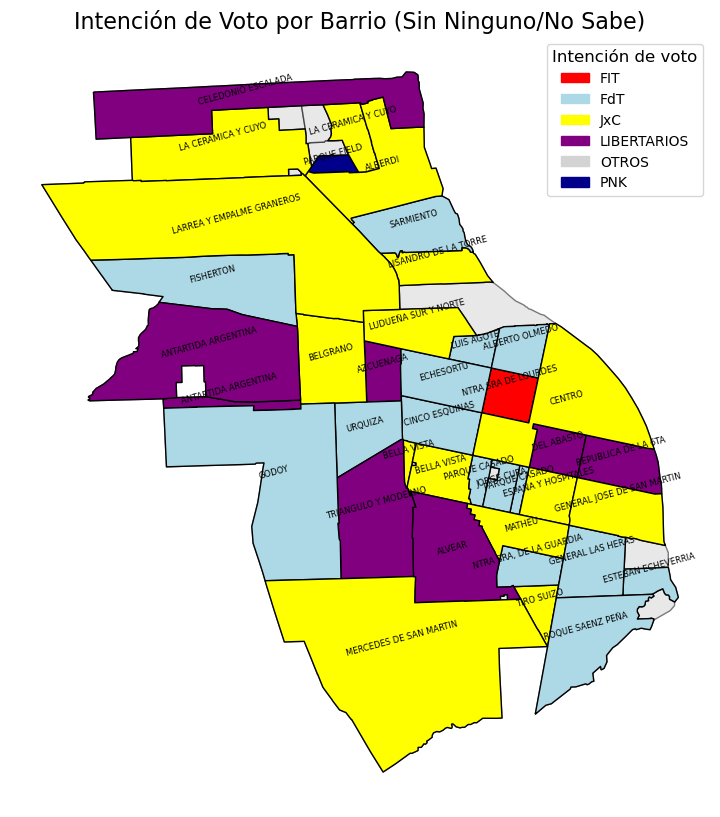

In [38]:
# Calcular el centroide de cada barrio para colocar el texto
barrios_3['centroid'] = barrios_3.geometry.centroid

# Graficar el polígono de Rosario
fig, ax = plt.subplots(figsize=(10, 10))
barrios.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)  # Polígono de Rosario
barrios_3.plot(ax=ax, color=barrios_3['color'], edgecolor='black')

# Añadir nombres de los barrios
for idx, row in barrios_3.iterrows():
    # Obtener las coordenadas del centroide y el nombre del barrio
    x, y = row['centroid'].x, row['centroid'].y
    nombre_barrio = row['BARRIO']
    
    # Colocar el nombre del barrio en el centro del polígono
    ax.annotate(
    nombre_barrio, 
    xy=(x, y), 
    fontsize=6, 
    ha='center', 
    rotation=15,  # Rotación en grados
    color='black'
)


# Crear los elementos de la leyenda basados en la paleta
import matplotlib.patches as mpatches
leyenda = [
    mpatches.Patch(color=color, label=partido) for partido, color in paleta_2.items()
]

# Añadir la leyenda al gráfico
ax.legend(handles=leyenda, title="Intención de voto", loc='upper right', fontsize=10, title_fontsize=12)

# Personalización del gráfico
ax.set_title('Intención de Voto por Barrio (Sin Ninguno/No Sabe)', fontsize=16)
ax.axis('off')
plt.show()


In [483]:
censales = gpd.read_file("Pruebas\\Radios_Censales.csv")
#censales.columns

In [313]:
# Eliminar filas con valores nulos en las columnas específicas
censales = censales.dropna(subset=["Segmento socioeconÃ³mico del radio"])
censales = censales.dropna(subset=['GeometrÃ­a en GeoJSON'])


In [465]:
# Convertir el DataFrame a un GeoDataFrame, estableciendo la columna de geometría
from shapely.geometry import shape
import json
censales['GeometrÃ­a en GeoJSON'] = censales['GeometrÃ­a en GeoJSON'].apply(lambda x: shape(json.loads(x)))
censales = gpd.GeoDataFrame(censales, geometry='GeometrÃ­a en GeoJSON')
print(type(censales))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [467]:
censales.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

EPSG:4326


In [319]:
df_est = gpd.sjoin(gdf, estratos, how="inner", predicate="within")
col = [
    'EDAD', 'GENERO', 'INT DE VOTO X ESPACIO', 'RADIO', 'geometry', 
    'PoblaciÃ³n de 18 y mÃ¡s hasta primaria', 'PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo',
    'PoblaciÃ³n de 18 y mÃ¡s con secundario completo o terciario sin universitario completo',
    'PoblaciÃ³n con universitario completo o mÃ¡s', 'Hogares con hacinamiento (>= 3 personas por cuarto)',
    'Hogares sin caÃ±erÃ­a de agua en la vivienda', 'Hogares sin cloaca / red pÃºblica',
    'Hogares con calidad de la vivienda insuficiente', 'Hogares con calidad de la vivienda precaria',
    'Segmento socioeconÃ³mico del radio', 'CÃ³digo de provincia', 'Nombre de provincia',
    'CÃ³digo de departamentos/comuna', 'Nombre de departamentos/comuna', 'CÃ³digo de radio', 
    'PoblaciÃ³n total', 'Total de hogares', 'Latitud del centroide', 'Longitud del centroide',
    'Superficie en km2'
]

# Seleccionar solo las columnas deseadas
df_est = df_est[col]

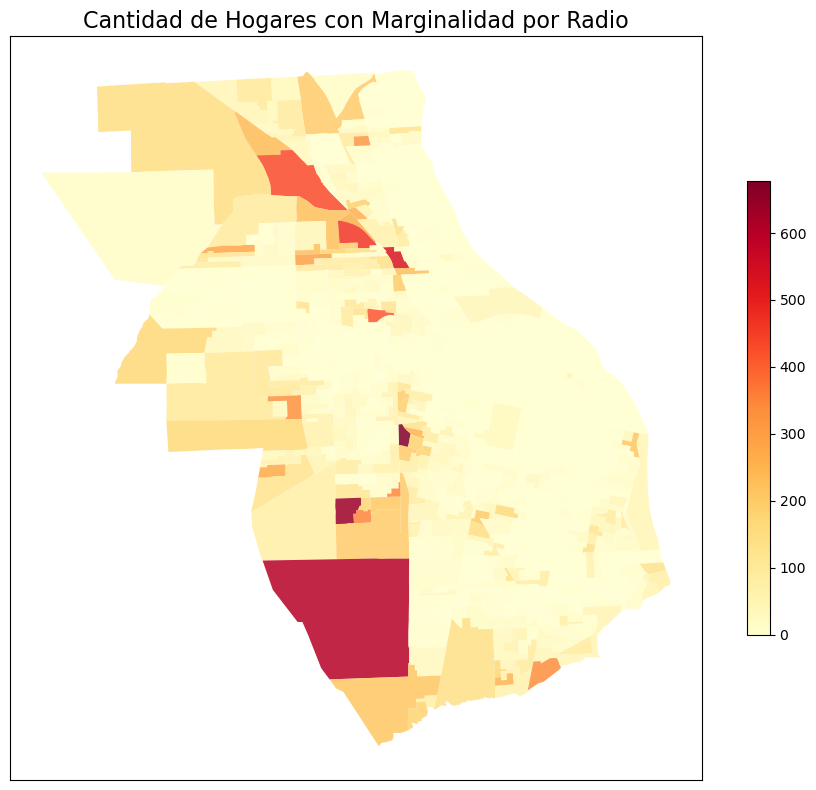

In [479]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Asegurarse de que la columna 'Hogares total con marginalidad' sea numérica
censales['Hogares total con marginalidad'] = pd.to_numeric(censales['Hogares total con marginalidad'], errors='coerce')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos con la paleta 'YlOrRd' (de amarillo oscuro a rojo/marrón)
censales.plot(
    column="Hogares total con marginalidad", 
    ax=ax, 
    legend=False,  # Desactivar la leyenda predeterminada
    cmap='YlOrRd',  # Usamos la paleta 'YlOrRd' para colores de amarillo a rojo/marrón
    alpha=0.85  # Transparencia para las áreas  
)

# Ajustar la leyenda
norm = Normalize(vmin=censales['Hogares total con marginalidad'].min(), vmax=censales['Hogares total con marginalidad'].max())  # Normalización según los valores
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
sm.set_array([])

# Añadir la barra de colores (leyenda) en el gráfico
fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)

# Eliminar escritura en ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Título
ax.set_title('Cantidad de Hogares con Marginalidad por Radio', fontsize=16)

# Mostrar gráfico
plt.tight_layout()
plt.show()



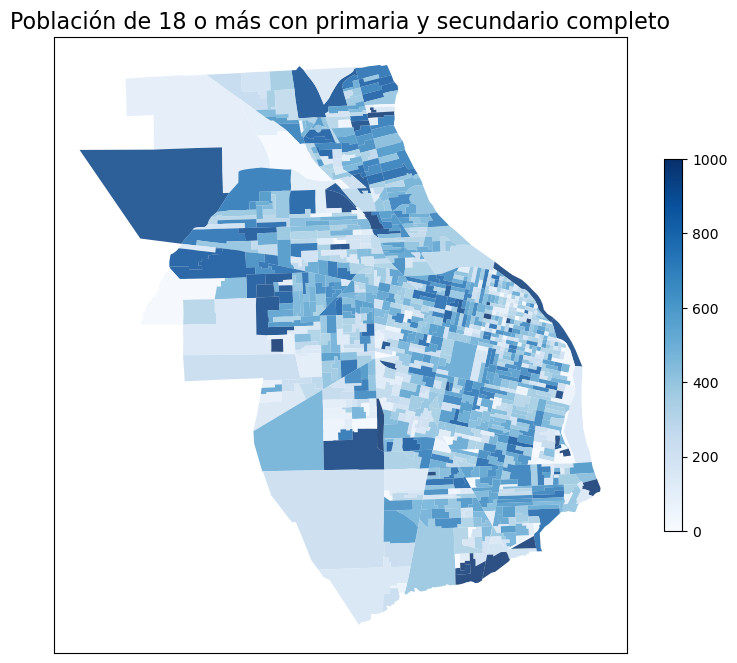

In [351]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos con paleta de azules (variable numérica) sin leyenda predeterminada
censales.plot(
    column='PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo', 
    ax=ax, 
    legend=False,  # Desactivar la leyenda predeterminada
    cmap='Blues',  # Usamos la paleta 'Blues' para variables numéricas
    alpha=0.85
)

# Añadir la barra de colores (leyenda) en el gráfico de forma vertical
norm = Normalize(vmin=0, vmax=1000)  # Normalización para el rango de 0 a 1000
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])

# Añadir la barra de colores (leyenda) en el gráfico
fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)

# Eliminar escritura en ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Título
ax.set_title('Población de 18 o más con primaria y secundario completo', fontsize=16)

# Mostrar gráfico
plt.show()




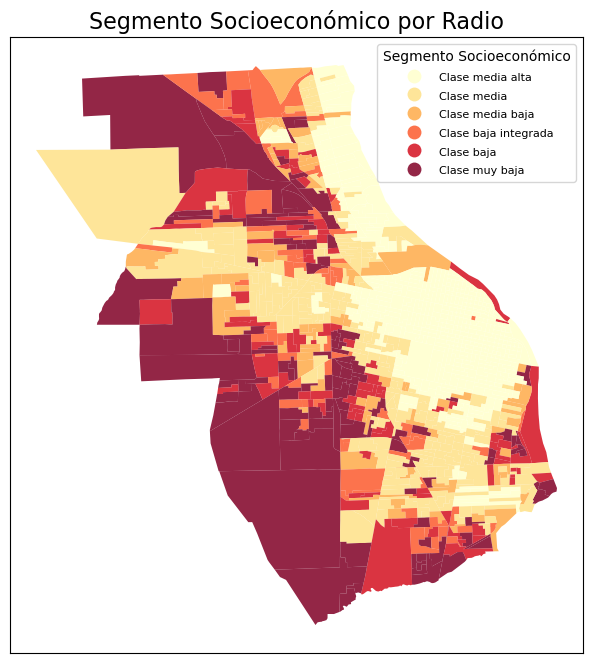

In [349]:
# 7 es Clase muy baja, 6 Clase baja , 5	Clase baja integrada, 4 Clase media baja,3 Clase media, 2 Clase media alta	

fig, ax = plt.subplots(figsize=(12, 8))


censales.plot(
    column='Segmento socioeconÃ³mico del radio', 
    ax=ax, 
    legend=True, 
    cmap='YlOrRd',  # Usamos una paleta ordinal
    alpha=0.85
)

# leyenda
legend = ax.get_legend()
legend_labels = [
    "Clase media alta",
    "Clase media",
    "Clase media baja",
    "Clase baja integrada",
    "Clase baja",
    "Clase muy baja"
]


for text, label in zip(legend.get_texts(), legend_labels):
    text.set_text(label)

legend.set_title("Segmento Socioeconómico", prop={'size': 10})  # Título más pequeño
for label in legend.get_texts():
    label.set_fontsize(8) 



ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Título
ax.set_title('Segmento Socioeconómico por Radio', fontsize=16)

# Mostrar gráfico
plt.show()


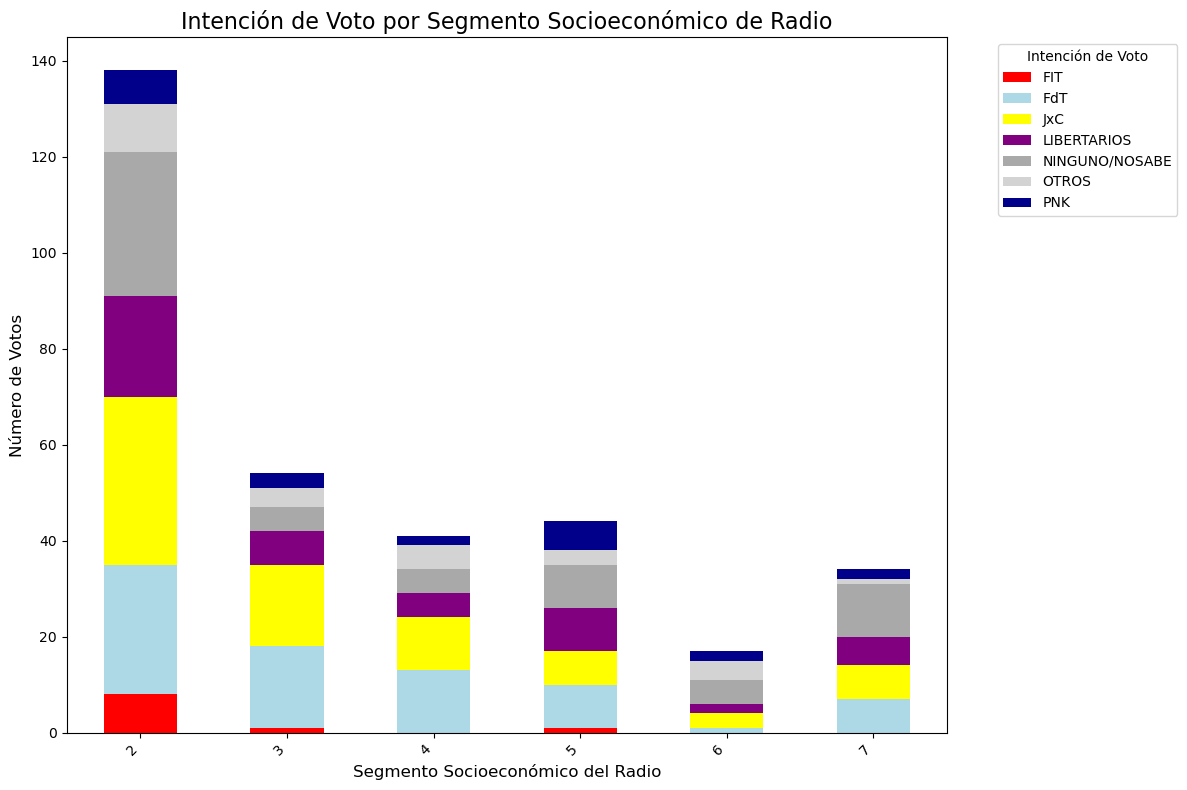

In [481]:
#GRAFICO OPCIONAL
# Definir la paleta de colores
paleta = {
    "FIT": "red",             
    "FdT": "lightblue",       
    "JxC": "yellow",          
    "LIBERTARIOS": "purple",  
    "NINGUNO/NOSABE": "darkgray",  
    "OTROS": "lightgray",     
    "PNK": "darkblue"         
}

# Agrupar por 'Segmento socioeconÃ³mico del radio' y 'INT DE VOTO X ESPACIO'
df_grouped = df_est.groupby(['Segmento socioeconÃ³mico del radio', 'INT DE VOTO X ESPACIO']).size().unstack(fill_value=0)

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las barras apiladas, por segmento socioeconómico
# Usamos la paleta personalizada con el método 'apply' para asignar los colores
df_grouped.plot(kind='bar', stacked=True, ax=ax, cmap=plt.cm.colors.ListedColormap(list(paleta.values())), figsize=(12, 8))

# Añadir título y etiquetas
ax.set_title('Intención de Voto por Segmento Socioeconómico de Radio', fontsize=16)
ax.set_xlabel('Segmento Socioeconómico del Radio', fontsize=12)
ax.set_ylabel('Número de Votos', fontsize=12)

# Mejorar la leyenda
ax.legend(title="Intención de Voto", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Mejorar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [551]:
resultados = gpd.read_file("Pruebas\\resultados_2019.csv")
#resultados.columns

Index(['CÃ³digo de departamento', 'CÃ³digo de radio', 'Votos positivos',
       'FÃ³rmula con mÃ¡s votos', 'Votos de la fÃ³rmula ganadora',
       'Juan JosÃ© GÃ³mez CenturiÃ³n (F. Nos)', 'NicolÃ¡s del CaÃ±o (FIT)',
       'Mauricio Macri (JxC)', 'Alberto FernÃ¡ndez (FDT)',
       'Roberto Lavagna (C. Federal)', 'JosÃ© Luis Espert (Unite)',
       'CÃ³digo de provincia', 'Nombre de provincia',
       'CÃ³digo de departamentos/comuna', 'Nombre de departamentos/comuna',
       'CÃ³digo de radio', 'PoblaciÃ³n total', 'Total de hogares',
       'Latitud del centroide', 'Longitud del centroide', 'Superficie en km2',
       'GeometrÃ­a en GeoJSON'],
      dtype='object')

In [553]:
# Eliminar filas con valores nulos en las columnas específicas
resultados = resultados.dropna(subset=['FÃ³rmula con mÃ¡s votos'])
resultados = resultados.dropna(subset=['GeometrÃ­a en GeoJSON'])

In [555]:
# Convertir el DataFrame a un GeoDataFrame, estableciendo la columna de geometría
from shapely.geometry import shape
import json
resultados['GeometrÃ­a en GeoJSON'] = resultados['GeometrÃ­a en GeoJSON'].apply(lambda x: shape(json.loads(x)))
resultados = gpd.GeoDataFrame(resultados, geometry='GeometrÃ­a en GeoJSON')
print(type(resultados))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [557]:
resultados.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

EPSG:4326


In [559]:
df_ele = gpd.sjoin(gdf, resultados, how="inner", predicate="within")

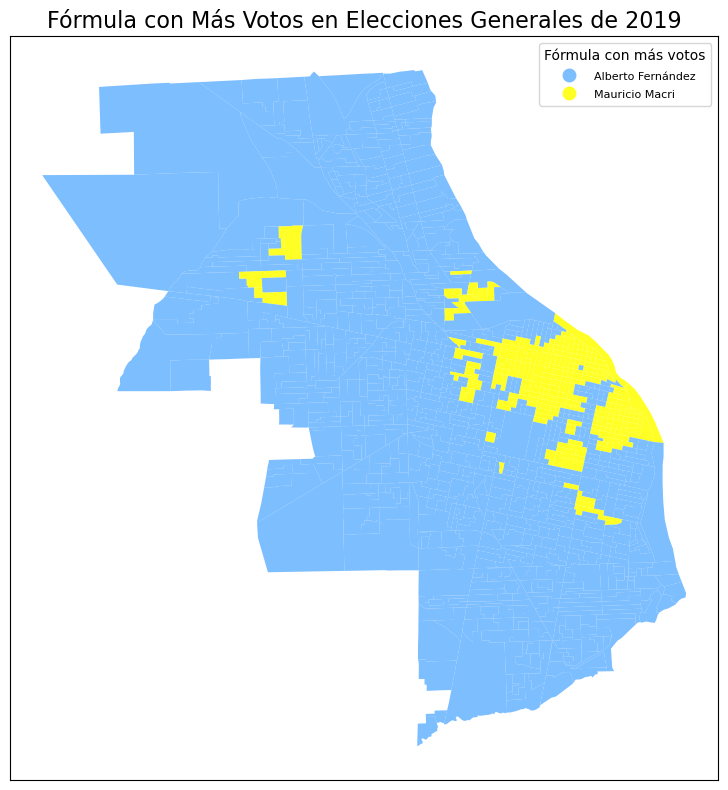

In [575]:

from matplotlib.colors import ListedColormap

# Crear un diccionario de colores
colores = {
    "Alberto Fernández": "#66B3FF",
    "Mauricio Macri": "yellow"
}

# Crear la paleta categórica
paleta = ListedColormap([colores["Alberto Fernández"], colores["Mauricio Macri"]])

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos con la paleta categórica personalizada
resultados.plot(
    column="FÃ³rmula con mÃ¡s votos",  # Nombre exacto de la columna
    ax=ax,
    legend=True,  # Mostrar la leyenda
    cmap=paleta,  # Paleta personalizada
    alpha=0.85  # Transparencia para las áreas
)

# Ajustar la leyenda
legend = ax.get_legend()
legend_labels = [
    "Alberto Fernández",
    "Mauricio Macri",
]

for text, label in zip(legend.get_texts(), legend_labels):
    text.set_text(label)

legend.set_title("Fórmula con más votos", prop={'size': 10})  # Título más pequeño
for label in legend.get_texts():
    label.set_fontsize(8)

# Eliminar etiquetas de los ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Título
ax.set_title('Fórmula con Más Votos en Elecciones Generales de 2019', fontsize=16)

# Mostrar gráfico
plt.tight_layout()
plt.show()
